In [44]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [45]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import xgboost as xgb

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

### Import Datset

In [46]:
df = pd.read_csv("churn_data.csv")
df[::10000]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_inc_price,inc_pct,weekday_pct,fancy_car_user,city_Carthag,city_Harko,phone_iPhone,first_month_cat_more_1_trip,first_month_cat_no_trips,month_5_still_here
0,3.67,5.0,4.7,1.1,15.4,46.2,True,0,1,1,1,0,1
10000,1.77,4.5,4.5,1.0,0.0,100.0,False,0,0,1,0,1,0
20000,3.08,5.0,4.7,1.0,0.0,33.3,False,1,0,1,1,0,0
30000,1.16,4.8,5.0,1.0,0.0,100.0,True,0,0,1,1,0,1
40000,10.75,5.0,NaN,1.0,0.0,0.0,False,1,0,1,0,0,0


### Data Information

In [47]:
# Check Column Details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   avg_dist                     50000 non-null  float64
 1   avg_rating_by_driver         49799 non-null  float64
 2   avg_rating_of_driver         41878 non-null  float64
 3   avg_inc_price                50000 non-null  float64
 4   inc_pct                      50000 non-null  float64
 5   weekday_pct                  50000 non-null  float64
 6   fancy_car_user               50000 non-null  bool   
 7   city_Carthag                 50000 non-null  int64  
 8   city_Harko                   50000 non-null  int64  
 9   phone_iPhone                 50000 non-null  int64  
 10  first_month_cat_more_1_trip  50000 non-null  int64  
 11  first_month_cat_no_trips     50000 non-null  int64  
 12  month_5_still_here           50000 non-null  int64  
dtypes: bool(1), floa

In [48]:
# Fill Null Values with Average
df["avg_rating_by_driver"] = df["avg_rating_by_driver"].fillna(df["avg_rating_by_driver"].mean())

df["avg_rating_of_driver"] = df["avg_rating_of_driver"].fillna(df["avg_rating_of_driver"].mean())

In [49]:
# Chech If there are null values
df.isnull().sum()

avg_dist                       0
avg_rating_by_driver           0
avg_rating_of_driver           0
avg_inc_price                  0
inc_pct                        0
weekday_pct                    0
fancy_car_user                 0
city_Carthag                   0
city_Harko                     0
phone_iPhone                   0
first_month_cat_more_1_trip    0
first_month_cat_no_trips       0
month_5_still_here             0
dtype: int64

In [50]:
# Univariate Analysis
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_inc_price,inc_pct,weekday_pct,city_Carthag,city_Harko,phone_iPhone,first_month_cat_more_1_trip,first_month_cat_no_trips,month_5_still_here
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,60.926084,0.330680,0.202600,0.691640,0.410040,0.307800,0.449880
std,5.707357,0.445753,0.564977,0.222336,19.958811,37.081503,0.470463,0.401941,0.461821,0.491846,0.461588,0.497487
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,33.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,66.700000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,100.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


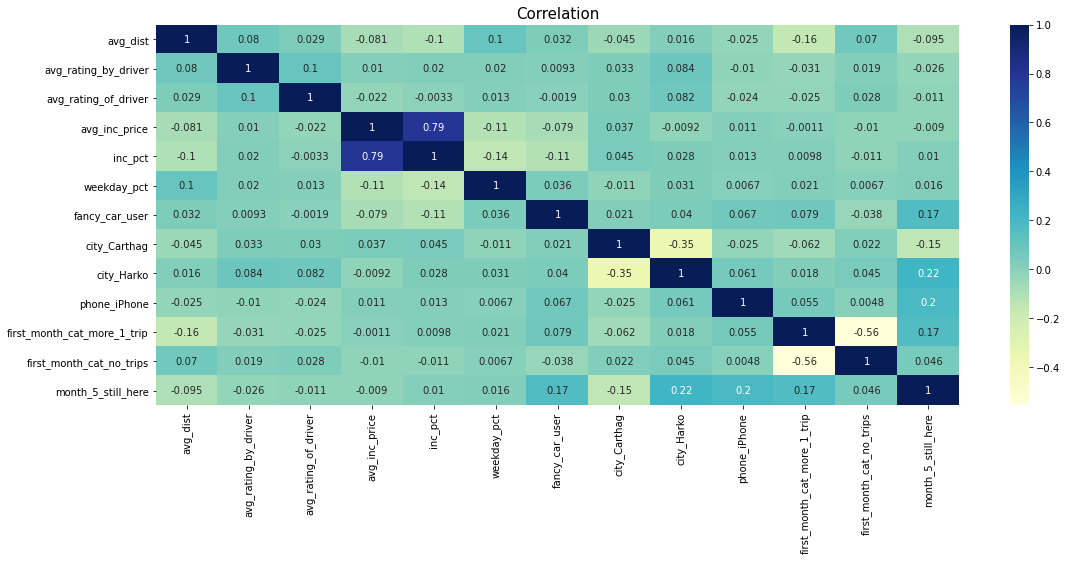

In [51]:
# Bivariate Analysis
plt.figure(figsize = (18, 7))
correlation = df.corr()
sns.heatmap(correlation, annot = True, cmap = "YlGnBu")
plt.title("Correlation", size = 15)
plt.show()

In [52]:
# dummy variables 
df["fancy_car_user"] = pd.get_dummies(df["fancy_car_user"])
df[::10000]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_inc_price,inc_pct,weekday_pct,fancy_car_user,city_Carthag,city_Harko,phone_iPhone,first_month_cat_more_1_trip,first_month_cat_no_trips,month_5_still_here
0,3.67,5.0,4.700000,1.1,15.4,46.2,0,0,1,1,1,0,1
10000,1.77,4.5,4.500000,1.0,0.0,100.0,1,0,0,1,0,1,0
20000,3.08,5.0,4.700000,1.0,0.0,33.3,1,1,0,1,1,0,0
30000,1.16,4.8,5.000000,1.0,0.0,100.0,0,0,0,1,1,0,1
40000,10.75,5.0,4.601559,1.0,0.0,0.0,1,1,0,1,0,0,0


### Classification with XGBoost

In [53]:
# Features
X = df[df.columns.drop("month_5_still_here")]
# Target
y = df["month_5_still_here"]

# Split Data into Training and Test Set
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 12)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(n_estimators = 10,
                          objective = "binary:logistic",
                          eval_metric = "logloss")

# Fit the classifier to the training set
xg_cl.fit(x_train, y_train)

# Predict the labels of the test set: preds
y_pred = xg_cl.predict(x_test)

# Compare Actual and Predicted Values
pd.DataFrame({"Actual": y_test, "Predicted": y_pred})[::1000]

,Actual,Predicted
34622,1,0
49250,0,0
18888,0,0
31468,1,1
24952,0,0
43020,0,0
44585,1,1
44378,0,0
8710,1,0
141,1,1


In [54]:
score = accuracy_score(y_test, y_pred)
print("Accuracy Score =", score.round(2))

Accuracy Score = 0.76


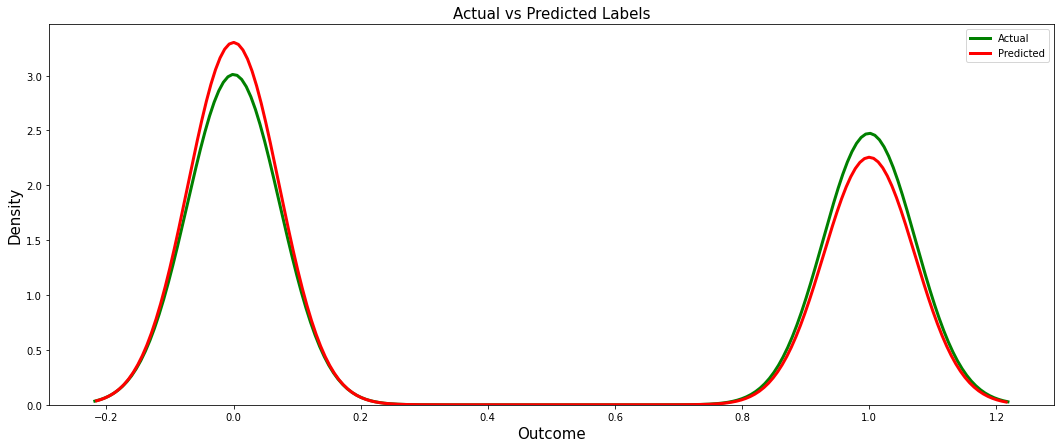

In [55]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", color = "green", linewidth = 3)
sns.kdeplot(y_pred, label = "Predicted", color = "red", linewidth = 3)
plt.title("Actual vs Predicted Labels", size = 15)
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

### Measuring Accuracy

In [56]:
# Create the DMatrix from X and y: churn_dmatrix
churn_dmatrix = xgb.DMatrix(data = X, label = y)

# Create the parameter dictionary: params
parameters = {"objective": "reg:logistic",
              "max_depth": 3}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain = churn_dmatrix,
                    params = parameters,
                    nfold = 3,
                    num_boost_round = 5,
                    metrics = "error",
                    as_pandas = True,
                    seed = 123)

# Print cv_results
cv_results

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.28312,0.002711,0.28430,0.001069
1,0.27268,0.002603,0.27512,0.003377
2,0.26213,0.002896,0.26312,0.002738
3,0.25397,0.001947,0.25492,0.003874
4,0.25109,0.001166,0.25232,0.002974


In [57]:
# Print the accuracy
print(1 - cv_results["test-error-mean"].iloc[-1].round(2))

0.75


### Measuring AUC

In [58]:
# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain = churn_dmatrix,
                    params = parameters,
                    nfold = 3,
                    num_boost_round = 5,
                    metrics = "auc",
                    as_pandas = True,
                    seed = 123)

# Print cv_results
cv_results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.766007,0.002242,0.764805,0.002610
1,0.783740,0.008109,0.781188,0.009069
2,0.804409,0.004401,0.802849,0.003376
3,0.818523,0.001870,0.817826,0.003100
4,0.825112,0.001469,0.823887,0.002317


In [59]:
print((cv_results["test-auc-mean"].iloc[-1]).round(2))

0.82


### Import Housing Dataset

In [60]:
dh = pd.read_csv("housing.csv")
dh[::100]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
100,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
200,0.01778,95.0,1.47,0,0.403,7.135,13.9,7.6534,3,402,17.0,384.30,4.45,32.9
300,0.04417,70.0,2.24,0,0.400,6.871,47.4,7.8278,5,358,14.8,390.86,6.07,24.8
400,25.04610,0.0,18.10,0,0.693,5.987,100.0,1.5888,24,666,20.2,396.90,26.77,5.6
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8


In [61]:
# Features
X = dh[dh.columns.drop("MEDV")]

# Target
y = dh["MEDV"]

In [62]:
# Split Data into Training and Test Set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 123)

# XGBRessor Object
xg_reg = xgb.XGBRegressor(objective = "reg:squarederror",
                          n_estimators = 10,
                          seed = 123)

# Fit Training Data into Model
xg_reg.fit(X_train, y_train)

# Prediction
y_pred = xg_reg.predict(X_test)

# Actual and Predicted Values
pd.DataFrame({"Actual": y_test, "Predicted": y_pred})[::20]

,Actual,Predicted
410,15.0,27.008783
134,15.6,14.735039
190,37.0,28.995293
131,19.6,17.310354
227,31.6,30.920675
345,17.5,19.185724


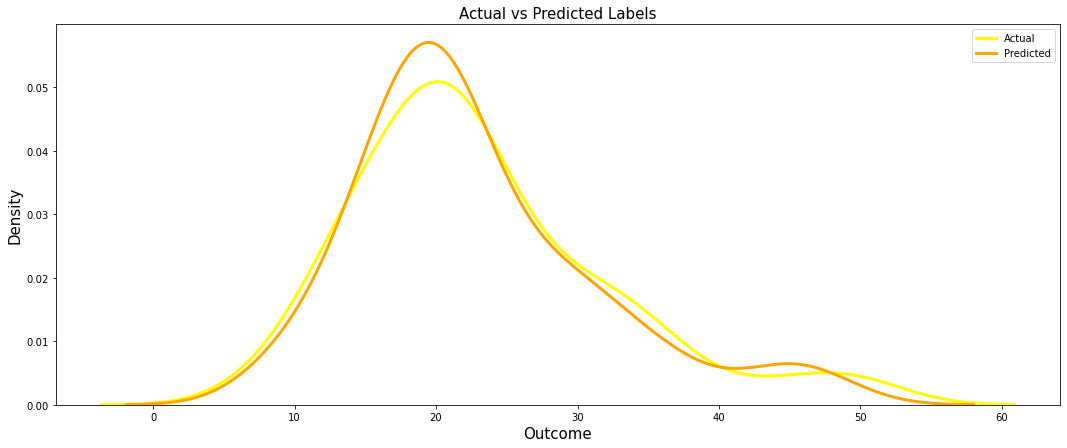

In [63]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", color = "yellow", linewidth = 3)
sns.kdeplot(y_pred, label = "Predicted", color = "orange", linewidth = 3)
plt.title("Actual vs Predicted Labels", size = 15)
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

In [64]:
rmse = MSE(y_test, y_pred)**(1/2)
print("Root Mean Squared Error =", rmse)

Root Mean Squared Error = 3.7824431053497274


**DMatrix Objects**

In [65]:
# Training DMatrix
DM_train = xgb.DMatrix(data = X_train, label = y_train)

# Testing DMatrix
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [66]:
parameters = {"booster": "gblinear",
              "objective": "reg:squarederror"}

xg_reg = xgb.train(params = parameters,
                   dtrain = DM_train, 
                   num_boost_round = 10)

preds = xg_reg.predict(DM_test)
pd.DataFrame({"Actual": y_test, "Predicted": y_pred})[::20]

,Actual,Predicted
410,15.0,27.008783
134,15.6,14.735039
190,37.0,28.995293
131,19.6,17.310354
227,31.6,30.920675
345,17.5,19.185724


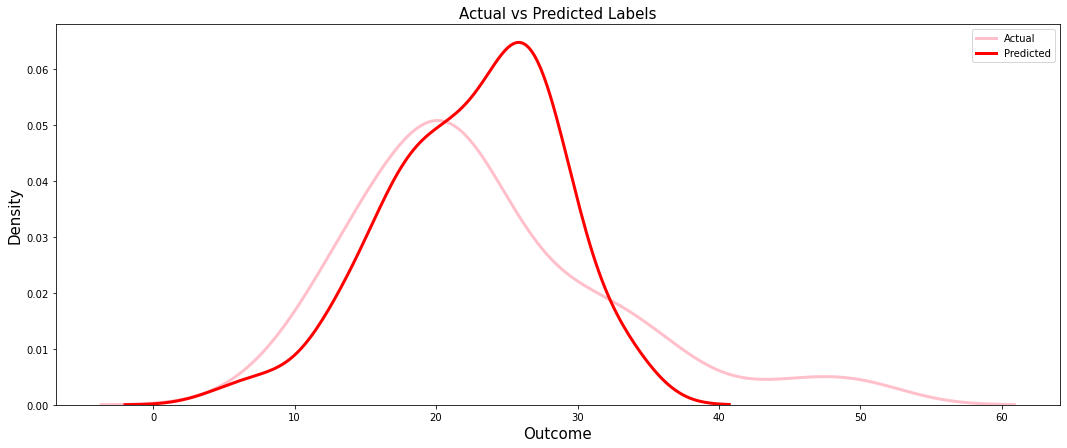

In [67]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", color = "pink", linewidth = 3)
sns.kdeplot(preds, label = "Predicted", color = "red", linewidth = 3)
plt.title("Actual vs Predicted Labels", size = 15)
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

In [68]:
rmse = MSE(y_test, y_pred)**(1/2)
print("Root Mean Squared Error =", rmse)

Root Mean Squared Error = 3.7824431053497274


### Decision trees as base learners

In [69]:
df = pd.read_csv("Ames_housing.csv")
df.T

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
MSSubClass,60.0,20.0,60.0,70.0,60.0,50.0,20.0,60.0,50.0,190.0,...,90.0,20.0,180.0,20.0,20.0,60.0,20.0,70.0,20.0,20.0
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,0.0,51.0,50.0,...,60.0,78.0,35.0,90.0,62.0,62.0,85.0,66.0,68.0,75.0
LotArea,8450.0,9600.0,11250.0,9550.0,14260.0,14115.0,10084.0,10382.0,6120.0,7420.0,...,9000.0,9262.0,3675.0,17217.0,7500.0,7917.0,13175.0,9042.0,9717.0,9937.0
OverallQual,7.0,6.0,7.0,7.0,8.0,5.0,8.0,7.0,7.0,5.0,...,5.0,8.0,5.0,5.0,7.0,6.0,6.0,7.0,5.0,5.0
OverallCond,5.0,8.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,6.0,...,5.0,5.0,5.0,5.0,5.0,5.0,6.0,9.0,6.0,6.0
YearBuilt,2003.0,1976.0,2001.0,1915.0,2000.0,1993.0,2004.0,1973.0,1931.0,1939.0,...,1974.0,2008.0,2005.0,2006.0,2004.0,1999.0,1978.0,1941.0,1950.0,1965.0
Remodeled,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
GrLivArea,1710.0,1262.0,1786.0,1717.0,2198.0,1362.0,1694.0,2090.0,1774.0,1077.0,...,1792.0,1578.0,1072.0,1140.0,1221.0,1647.0,2073.0,2340.0,1078.0,1256.0
BsmtFullBath,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
BsmtHalfBath,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
# Features 
X = df[df.columns.drop("SalePrice")]

# Target
y = df["SalePrice"]

In [71]:
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective = "reg:squarederror",
                          n_estimators = 10,
                          booster = "gbtree",
                          seed = 123)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Actual vs Predicted
pd.DataFrame({"Actual": y_test, "Predicted": preds})[::50]

,Actual,Predicted
147,222500,211622.593750
800,200000,196844.937500
1185,104900,126583.265625
558,175000,185860.906250
1254,165400,173605.312500
1303,232000,197413.593750
585,369900,332896.093750
328,214500,165170.390625
603,151000,145869.906250


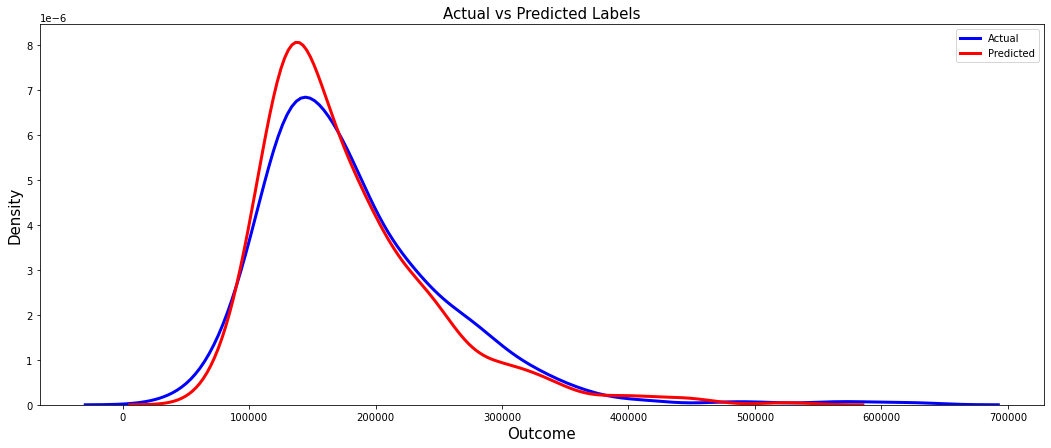

In [72]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", color = "blue", linewidth = 3)
sns.kdeplot(preds, label = "Predicted", color = "red", linewidth = 3)
plt.title("Actual vs Predicted Labels", size = 15)
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

In [73]:
rmse = MSE(y_test, preds)**(1/2)
print("Root Mean Squared Error =", rmse)

Root Mean Squared Error = 28123.29821929723


### Linear base learners

In [74]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data = X_train, label = y_train)

DM_test = xgb.DMatrix(data = X_test, label = y_test)

# Create the parameter dictionary: parameters
parameters = {"booster": "gblinear",
              "objective": "reg:squarederror"}

# Train the model: xg_reg
xg_reg = xgb.train(params = parameters,
                   dtrain = DM_train,
                   num_boost_round = 5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Actual vs Predicted
pd.DataFrame({"Actual": y_test, "Predicted": preds})[::50]

,Actual,Predicted
147,222500,185854.843750
800,200000,212082.187500
1185,104900,143479.796875
558,175000,207044.890625
1254,165400,164196.234375
1303,232000,227272.031250
585,369900,283691.656250
328,214500,163310.984375
603,151000,195314.375000


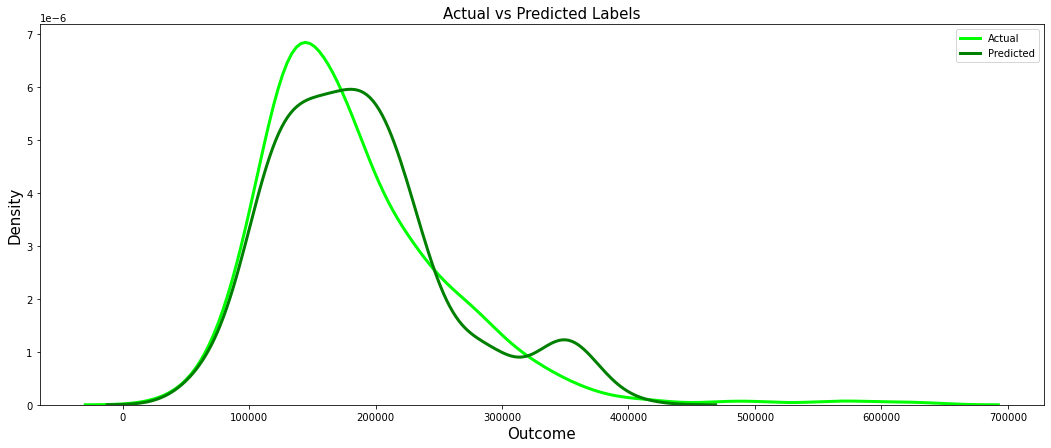

In [75]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", color = "lime", linewidth = 3)
sns.kdeplot(preds, label = "Predicted", color = "green", linewidth = 3)
plt.title("Actual vs Predicted Labels", size = 15)
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

In [76]:
rmse = MSE(y_test, preds)**(1/2)
print("Root Mean Squared Error =", rmse)

Root Mean Squared Error = 43102.80649934938


### Evaluating Model Quality

**Compute RMSE**

In [77]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data = X, label = y)

# Create the parameter dictionary: params
parameters = {"objective": "reg:squarederror",
          "max_depth": 4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain = housing_dmatrix,
                    params = parameters,
                    nfold = 5,
                    num_boost_round = 5,
                    metrics = "rmse",
                    as_pandas = True,
                    seed = 123)

# Print cv_results
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,141749.846875,468.175033,142352.387500,2399.705575
1,102883.389063,329.926897,104384.757813,2310.759583
2,75898.381250,345.346081,78586.526563,2104.527339
3,57266.828906,360.678819,61865.894532,2451.783685
4,44624.368750,436.915692,50724.406250,2894.907084


In [78]:
print(cv_results["test-rmse-mean"].iloc[-1].round(2))

50724.41


**Compute MAE**

In [79]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data = X, label = y)

# Create the parameter dictionary: params
parameters = {"objective": "reg:squarederror",
              "max_depth": 4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain = housing_dmatrix,
                    params = parameters,
                    nfold = 4,
                    num_boost_round = 5,
                    metrics = "mae",
                    as_pandas = True,
                    seed = 123)
# Print cv_results
cv_results

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,127343.572266,668.344199,127633.988282,2403.993968
1,89770.056641,456.949630,90122.498047,2107.907095
2,63580.791016,263.405561,64278.559571,1887.564512
3,45633.141602,151.886070,46819.167969,1459.813514
4,33587.092774,86.999470,35670.649414,1140.607637


In [80]:
# Extract and print final boosting round metric
print(cv_results["test-mae-mean"].iloc[-1].round(2))

35670.65


### Regularization and base learners in XGBoost

**L1 Regularization in XGBoost**

In [102]:
# Bosten Data
df = pd.read_csv("housing.csv")
df[::100]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
100,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
200,0.01778,95.0,1.47,0,0.403,7.135,13.9,7.6534,3,402,17.0,384.30,4.45,32.9
300,0.04417,70.0,2.24,0,0.400,6.871,47.4,7.8278,5,358,14.8,390.86,6.07,24.8
400,25.04610,0.0,18.10,0,0.693,5.987,100.0,1.5888,24,666,20.2,396.90,26.77,5.6
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8


In [103]:
# Feature
X = df[df.columns.drop("MEDV")]

# Target
y = df["MEDV"]

In [104]:
# Objective (linear) 
boston_dmatrix = xgb.DMatrix(data = X, label = y)

parameters = {"objective": "reg:squarederror",
              "max_depth": 4}

l1_params = [0.1, 0.5, 1, 10, 100]

rmses_l1 = []

for reg in l1_params:
    parameters["alpha"] = reg
    cv_results = xgb.cv(dtrain = boston_dmatrix,
                        params = parameters,
                        nfold = 4,
                        num_boost_round = 10,
                        metrics = "rmse",
                        as_pandas = True,
                        seed = 123)
    rmses_l1.append(cv_results["test-rmse-mean"].tail(1).values[0])
rmses_l1

[3.54517525, 3.56544775, 3.46147425, 3.8211522500000004, 4.6455185]

In [105]:
pd.DataFrame(list(zip(l1_params, rmses_l1)), columns = ["l1", "rmse"])

,l1,rmse
0,0.1,3.545175
1,0.5,3.565448
2,1.0,3.461474
3,10.0,3.821152
4,100.0,4.645518


**Using regularization in XGBoost**

In [106]:
# Feature
X = df[df.columns.drop("MEDV")]

# Target
y = df["MEDV"]

In [107]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data = X, label = y)

reg_params = [0.1, 0.5, 1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: parameters
parameters = {"objective": "reg:squarederror",
              "max_depth": 3}


# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:
    parameters["lambda"] = reg
    cv_results = xgb.cv(dtrain = housing_dmatrix,
                        params = parameters,
                        nfold = 2,
                        num_boost_round = 5,
                        metrics = "rmse",
                        as_pandas = True,
                        seed = 123)
    rmses_l2.append(cv_results["test-rmse-mean"].tail(1).values[0])
rmses_l2

[5.702486, 5.878759499999999, 6.0222225, 7.2015205, 10.692150000000002]

In [108]:
pd.DataFrame(list(zip(reg_params, rmses_l2)), columns = ["l2", "rmse"])

,l2,rmse
0,0.1,5.702486
1,0.5,5.878759
2,1.0,6.022222
3,10.0,7.201520
4,100.0,10.692150


**Visualizing individual XGBoost trees**

<Figure size 2880x1440 with 0 Axes>

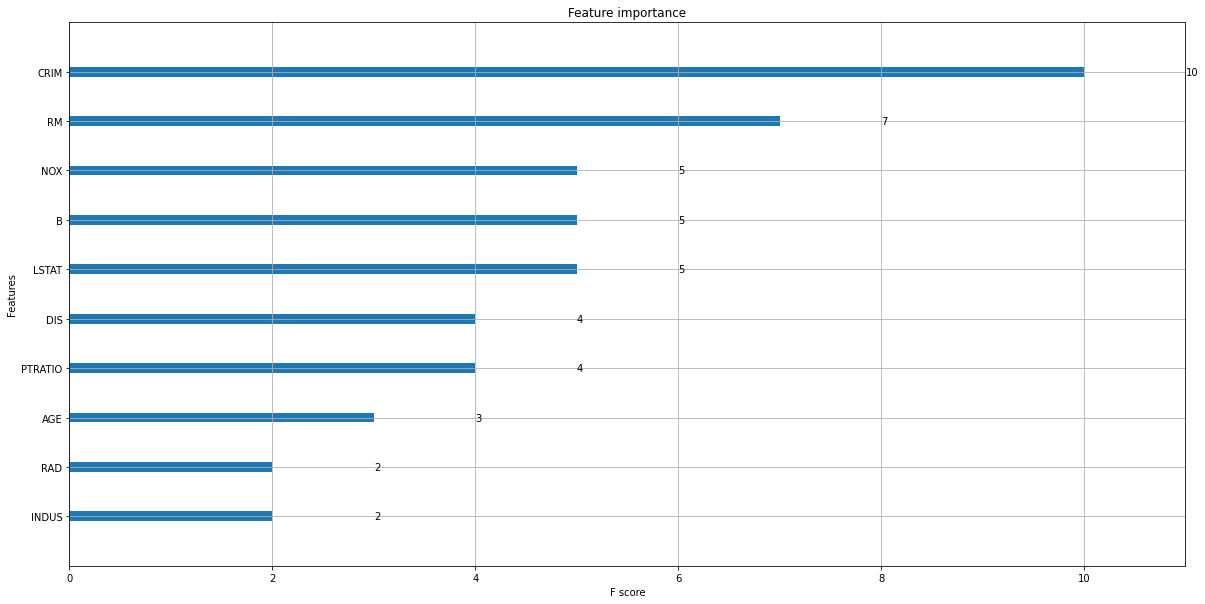

In [133]:
# Train the model: xg_reg
xg_reg = xgb.train(params = parameters,
                   dtrain = housing_dmatrix,
                   num_boost_round = 10)

# Plot the first tree
plt.figure(figsize=(40,20))
xgb.plot_importance(xg_reg)
plt.rcParams["figure.figsize"] = (10,10)
plt.show()